# Getting Started

This notebook is to help new users get started with using the `pysplot` python package for spatiotemporal plotting.
We will run through examples of how to retrieve spatial and science data and combine it into an object that will be suitable for `pysplot` plotting.

In [1]:
## install if not present
### !pip install cdasws

In [2]:
from sunpy.coordinates import GeocentricSolarEcliptic, Geomagnetic
from astropy.coordinates import ITRS
import astropy.units as u
from cdasws import CdasWs, TimeInterval
from cdasws.datarepresentation import DataRepresentation as dr

from pysplot.io.data import SpatialData, ScienceData, SpatialTimeData

## Step 1: Create SpatialData and ScienceData object

Here we will step through an example of splotting MMS data for one month.

#### SpatialData
SpatialData is an object containing information on the location of the spacecraft.
SpatialData expects data to be fed in with a dictionary where 'x' is a list of epochs in datetime format and 'y' contains the values.
If you use `pyspedas` to retrieve the data, the data will output in the correct format if the keyword `notplot=True`. Otherwise, you could read in the data however you like and make sure the input dictionary contains 'x' and 'y' in the same format. In this example, we use the `cdasws` package to stream data directly from CDAWeb. 

Splot data objects, like `SpatialData`, is designed work with `sunpy` and `astropy`, especially the coordinate frames and units. Though not required to initialize splot data with coordinate frames or units, it will make transforming between coordinates or unit quantities much easier.

In [3]:
cdas = CdasWs()
_, mms_mec_data = cdas.get_data("MMS1_MEC_SRVY_L2_EPHT89Q", ["mms1_mec_r_geo"], TimeInterval('2020-01-01', '2020-01-05'), dataRepresentation = dr.XARRAY)
spatial_data = {'x': mms_mec_data['Epoch'].values, 'y': mms_mec_data['mms1_mec_r_geo'].values}
spatial_data

{'x': array(['2020-01-01T00:00:00.000000000', '2020-01-01T00:00:30.000000000',
        '2020-01-01T00:01:00.000000000', ...,
        '2020-01-04T23:59:00.000000000', '2020-01-04T23:59:30.000000000',
        '2020-01-05T00:00:00.000000000'], dtype='datetime64[ns]'),
 'y': array([[-103022.14797985,  -22630.7481424 ,    6293.65967293],
        [-103114.89881914,  -22439.35411279,    6286.36814742],
        [-103207.2737431 ,  -22247.65570303,    6279.07470234],
        ...,
        [-146106.8419048 ,  -55165.44524281,   -4892.73738136],
        [-146244.03003486,  -54869.43150151,   -4900.51379811],
        [-146380.60842783,  -54573.07637966,   -4908.28976271]])}

In [4]:

spatial_data_obj = SpatialData(spatial_data, coord=ITRS, units=u.km, spatial_columns_names=['x_r_geo', 'y_r_geo', 'z_r_geo'], coord_kwargs={'representation_type':'cartesian'})

In [5]:
print(spatial_data_obj.data.head(10))
print('coordinates', spatial_data_obj.coord)
print('units', spatial_data_obj.units)

                           x_r_geo       y_r_geo      z_r_geo
2020-01-01 00:00:00 -103022.147980 -22630.748142  6293.659673
2020-01-01 00:00:30 -103114.898819 -22439.354113  6286.368147
2020-01-01 00:01:00 -103207.273743 -22247.655703  6279.074702
2020-01-01 00:01:30 -103299.271825 -22055.653658  6271.779326
2020-01-01 00:02:00 -103390.892258 -21863.348797  6264.482051
2020-01-01 00:02:30 -103482.134260 -21670.741971  6257.182879
2020-01-01 00:03:00 -103572.996908 -21477.833917  6249.881817
2020-01-01 00:03:30 -103663.479339 -21284.625433  6242.578875
2020-01-01 00:04:00 -103753.580509 -21091.117304  6235.274052
2020-01-01 00:04:30 -103843.299833 -20897.310501  6227.967312
coordinates <class 'astropy.coordinates.builtin_frames.itrs.ITRS'>
units km


#### Science Data

Most of the time, you also want to consider some scientific data to go along with the spatial data for plotting. Here's how you would initialize the `ScienceData` object, similar to `SpatialData`.

We'll pull magnetic field from the MMS FGM instrument for the same time period and initialize our `ScienceData` object.

In [6]:
_, mms_fgm_data = cdas.get_data("MMS1_FGM_SRVY_L2", ["mms1_fgm_b_gse_srvy_l2"], TimeInterval('2020-01-01', '2020-01-05'), dataRepresentation = dr.XARRAY)
science_data = {'x': mms_fgm_data['Epoch'].values, 'y':mms_fgm_data['mms1_fgm_b_gse_srvy_l2'].values}
science_data


{'x': array(['2020-01-01T00:00:00.023849411', '2020-01-01T00:00:00.086350301',
        '2020-01-01T00:00:00.148851190', ...,
        '2020-01-04T23:59:59.644811973', '2020-01-04T23:59:59.769813750',
        '2020-01-04T23:59:59.894815527'], dtype='datetime64[ns]'),
 'y': array([[  1.2351352 ,  15.014284  , -18.71197   ,  24.02274   ],
        [  1.1890574 ,  14.771348  , -18.227575  ,  23.49151   ],
        [  1.0073503 ,  14.434054  , -17.547987  ,  22.743977  ],
        ...,
        [  2.5222871 ,  -8.7770815 ,  -0.60825026,   9.152543  ],
        [  2.523703  ,  -8.787683  ,  -0.6247372 ,   9.164209  ],
        [  2.5143878 ,  -8.772815  ,  -0.6341995 ,   9.14804   ]],
       dtype=float32)}

In [7]:
science_data_obj = ScienceData(science_data, units=1e-9*u.T, science_columns_names=['Bx_GSE', 'By_GSE', 'Bz_GSE', 'Bt'])

In [8]:
print(science_data_obj.data.head(10))
print('units', science_data_obj.units)

                                 Bx_GSE     By_GSE     Bz_GSE         Bt
2020-01-01 00:00:00.023849411  1.235135  15.014284 -18.711969  24.022739
2020-01-01 00:00:00.086350301  1.189057  14.771348 -18.227575  23.491510
2020-01-01 00:00:00.148851190  1.007350  14.434054 -17.547987  22.743977
2020-01-01 00:00:00.211352080  0.796693  14.379056 -17.011660  22.288754
2020-01-01 00:00:00.273852969  0.971681  14.440439 -16.555071  21.989561
2020-01-01 00:00:00.336353859  1.298611  14.549273 -15.875175  21.572874
2020-01-01 00:00:00.398854748  1.292696  14.098995 -16.087919  21.430676
2020-01-01 00:00:00.461355638  1.083263  14.143856 -16.240618  21.563391
2020-01-01 00:00:00.523856527  1.394914  14.089476 -17.809347  22.751526
2020-01-01 00:00:00.586357416  1.861095  13.564971 -18.790823  23.250099
units 1e-09 T


#### Create the combined data object, `SpatialTimeData`

Now that you have both `SpatialData` and `ScienceData` initialized, you can combine them into an object for splotting (`SpatialTimeData`).

The spatial data was in GEO coordinates; however the science data was pulled in GSE coordinates. To rectify that, we can convert the spatial data to GSE to match the science data by with the `desired_coord` argument.


In [9]:
splot_data_obj = SpatialTimeData(spatial_data_obj, science=science_data_obj, desired_science_units=1e-9*u.T, desired_coord=GeocentricSolarEcliptic, desired_coord_kwargs={'representation_type':'cartesian'})

In [10]:

print(splot_data_obj.data.head(10))
print('splot spatial columns', splot_data_obj.spatial_columns)
print('splot coord', splot_data_obj.coord)
print('splot science columns', splot_data_obj.science_columns)
print('splot units', splot_data_obj.science_units)


                                          x             y             z  \
2020-01-01 00:00:00.023849411  92598.279957  24656.887269  44530.236531   
2020-01-01 00:00:00.086350301  92598.370133  24656.957250  44530.253003   
2020-01-01 00:00:00.148851190  92598.460310  24657.027231  44530.269476   
2020-01-01 00:00:00.211352080  92598.550486  24657.097212  44530.285948   
2020-01-01 00:00:00.273852969  92598.640662  24657.167193  44530.302420   
2020-01-01 00:00:00.336353859  92598.730838  24657.237174  44530.318893   
2020-01-01 00:00:00.398854748  92598.821015  24657.307155  44530.335365   
2020-01-01 00:00:00.461355638  92598.911191  24657.377136  44530.351837   
2020-01-01 00:00:00.523856527  92599.001367  24657.447117  44530.368309   
2020-01-01 00:00:00.586357416  92599.091543  24657.517098  44530.384782   

                                 Bx_GSE     By_GSE     Bz_GSE         Bt  
2020-01-01 00:00:00.023849411  1.235135  15.014283 -18.711969  24.022739  
2020-01-01 00:00:00.0863

## Step 2: Spatiotemporal plotting using the SpatialTimeData object

Now that the splot object is created, it contains a combined dataframe of spatial coordinates, in the requested spatial coordinate frame and units, and scientific values, in the requested units, presented on a matched, standardized cadence. This merged dataframe we can use to plot on a spatial and temporal regime.

In [11]:
from pysplot.plots.plottypes import orbit_plot, spatial_value_plot

In [12]:
# create additional science 

dat = splot_data_obj.data
R_E = 6378 #km
for col in splot_data_obj.spatial_columns:
    dat[f'r_{col}'] = dat[col]/R_E
dat['radius'] = (dat['r_x']**2 + dat['r_y']**2 + dat['r_z']**2)**.5

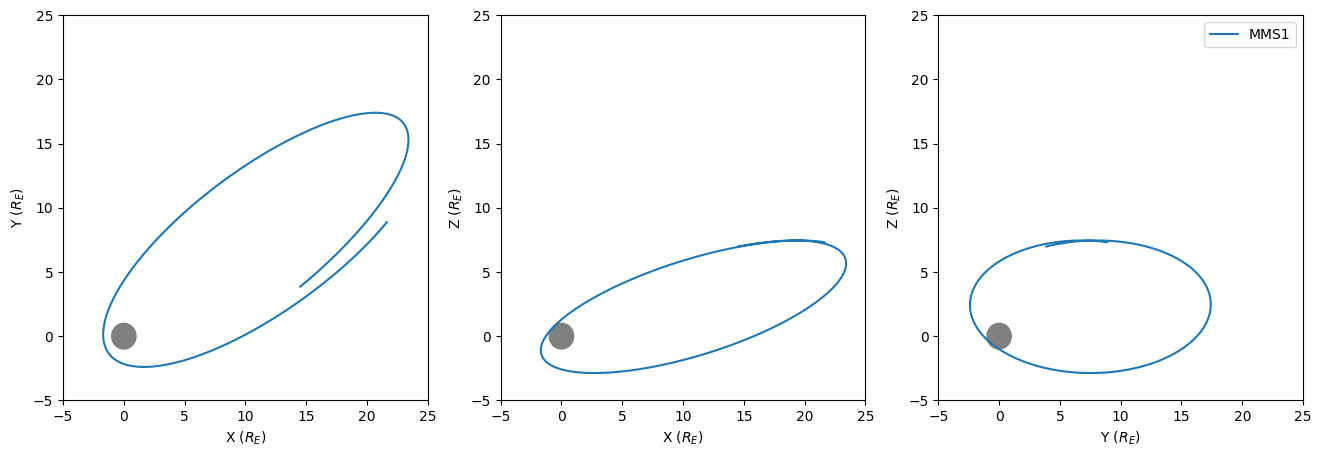

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))
xy_ax = ax[0]
orbit_plot(splot_data_obj.data, xy_ax, 'r_x', 'r_y')
xy_ax.set_xlabel('X ($R_E$)')
xy_ax.set_ylabel('Y ($R_E$)')
xz_ax = ax[1]
orbit_plot(splot_data_obj.data, xz_ax, 'r_x', 'r_z')
xz_ax.set_xlabel('X ($R_E$)')
xz_ax.set_ylabel('Z ($R_E$)')
yz_ax = ax[2]
orbit_plot(splot_data_obj.data, yz_ax, 'r_y', 'r_z', plotting_kwargs={'label': 'MMS1'})
yz_ax.legend()
yz_ax.set_xlabel('Y ($R_E$)')
yz_ax.set_ylabel('Z ($R_E$)')

for axes in ax:
    axes.set_xlim(-5,25)
    axes.set_ylim(-5,25)
    circ = plt.Circle((0,0), 1, color='0.5')
    axes.add_patch(circ)


(0.0, 5000.0)

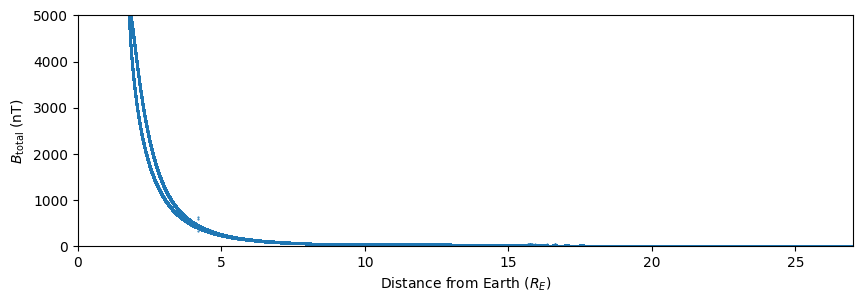

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,3))
spatial_value_plot(splot_data_obj.data, ax, 'radius', 'Bt', plotting_kwargs={'marker':'.', 'ms':1, 'ls': 'None'})
ax.set_xlabel('Distance from Earth ($R_E$)')
ax.set_ylabel('$B_\mathrm{total}$ (nT)')
ax.set_xlim(0,27)
ax.set_ylim(0,5000)

#### Transform from one coordinate frame to another

Since we used sunpy coordinate system to define the splot data spatial frame, we can use the underlying functionality of sunpy to transform the spatial coordinate from one frame to another. For example, we are currently in GeocentricSolarEcliptic with coordinate units in km, but we can transform the splot merged data to be presented in Geocentric Solar Magnetospheric frame with units of AU instead. Note that sunpy coordinate transformations can be very timely if the observing time is required to calculate the location of the Sun and Earth.

In [15]:
## TODO: make this work
#splot_data_obj.transform_coord(Geomagnetic, desired_units=u.AU)
#splot_data_obj.data